## Scraping all the PDFs

In [1]:
# import all necessary libraries

import camelot

In [2]:
# create a list of years

years=[]
for n in range(2006,2021,1):
  years.append(n)

years

[2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020]

In [3]:
d = {}
for year in years:
    file = f"Vornamen/vornamenstatistik_{year}.pdf"
    tables =camelot.read_pdf(file, pages='1',flavor='stream')
    d[year] = tables[0].df

In [6]:
d.keys()

dict_keys([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

## Data Cleaning

In [5]:
# check all the dataframes if scanned correctly--> 2014, 2015, 2016 weird

# correcting all the wrongly scanned 2014 values
d[2014].iloc[5,2]='Maximilian'
d[2014].iloc[21,2]='Max'
d[2014].iloc[34,2]='Michael'
d[2014].iloc[48,2]='Maxim'
d[2014].iloc[49,2]='Moritz'
d[2014].iloc[10,6]='Mia'
d[2014].iloc[13,6]='Mira'
d[2014].iloc[25,6]='Mila'
d[2014].iloc[31,6]='Marie'
d[2014].iloc[37,6]='Marlene'
d[2014].iloc[43,6]='Maria'
d[2014].iloc[49,6]='Mathilda'
d[2014].iloc[50,6]='Maya'

# correcting 2015 values
d[2015].iloc[8,2]='Maximilian'
d[2015].iloc[18,2]='Moritz'
d[2015].iloc[32,2]='Max'
d[2015].iloc[38,2]='Milan'
d[2015].iloc[52,2]='Michael'
d[2015].iloc[5,6]='Marie'
d[2015].iloc[6,6]='Mia'
d[2015].iloc[24,6]='Marlene'
d[2015].iloc[25,6]='Melina'
d[2015].iloc[28,6]='Maria'
d[2015].iloc[29,6]='Mila'
d[2015].iloc[30,6]='Mira'
d[2015].iloc[32,6]='Mina'
d[2015].iloc[41,6]='Matilda'

# change 2016 values
d[2016].iloc[11,2]='Maximilian'
d[2016].iloc[23,2]='Moritz'
d[2016].iloc[30,2]='Max'
d[2016].iloc[31,2]='Maxim'
d[2016].iloc[32,2]='Milan'
d[2016].iloc[9,6]='Mila'
d[2016].iloc[10,6]='Mia'
d[2016].iloc[13,6]='Mira'
d[2016].iloc[14,6]='Maria'
d[2016].iloc[19,6]='Marie'
d[2016].iloc[26,6]='Maja'
d[2016].iloc[27,6]='Maya'
d[2016].iloc[46,6]='Matilda'
d[2016].iloc[47,6]='Milena'
d[2016].iloc[48,6]='Mina'
d[2016].iloc[50,6]='Marlene'
d[2016].iloc[51,6]='Melina'

In [6]:
df_m = {}
df_f = {}
for year in years:
    if year in (2011,2012,2013,2017,2019,2020):
        # Delete the first 2 rows using iloc selector
        d[year] = d[year].iloc[2:,]
        # Delete the first 3 rows using iloc selector
    else: d[year] = d[year].iloc[3:,]
     # make the first row as the headers
    d[year].columns = d[year].iloc[0]
    d[year] = d[year][1:]
    # drop the ranking columns
    d[year]=d[year].drop("Rang", axis=1)
    # split the dataframe by Gender, first only keep the correct columns and hereby standardizing column index
    d[year]= d[year][['Vorname', 'Anzahl']]
    df_male=d[year].iloc[:,[0,2]]
    df_female=d[year].iloc[:,[1,3]]
    # rename the column to the year and append into a dictionary
    df_male=df_male.rename(columns={"Anzahl": year})
    df_female=df_female.rename(columns={"Anzahl": year})
    df_m[year] = df_male
    df_f[year] = df_female

In [7]:
# check if it was successful
df_m[2006]

# for thiy year we drop the row:
# "Weitere Vornamen mit gleicher oder geringerer" to later be able to convert everyting into int
df_m[2017]=df_m[2017].drop(53)
df_m[2019]=df_m[2019].drop(53)
df_f[2017]=df_f[2017].drop(53)
df_f[2019]=df_f[2019].drop(53)

In [8]:
# created a time series dataframe from all the years and save as pdf

import pandas as pd
from functools import partial, reduce                                                                              
                                                                                                                    
my_reduce = partial(pd.merge, on='Vorname', how='outer')                                                              
names_male=reduce(my_reduce, df_m.values()) 
names_female=reduce(my_reduce, df_f.values())

# save as csv to import into Flourish!
names_male.to_csv('Babynames male.csv', index = False, header=True)
names_female.to_csv('Babynames female.csv', index = False, header=True)

## Creating Wordclouds

In [9]:
# importing necessary libraries
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [10]:
# turn all the values into text blops
text_m={}
text_f={}
#print((df_f[2016][2016]).astype(int))
for year in years:
# turn the count as an integer for calculation, add a space and combine all rows to a text
    text_m[year]=(df_m[year][year].astype(int) * (df_m[year].Vorname+" ")).str.cat(sep=" ")
    text_f[year]=(df_f[year][year].astype(int) * (df_f[year].Vorname+" ")).str.cat(sep=" ")


In [11]:
# check the values
text_m[2009][:100]

'Maximilian Maximilian Maximilian Maximilian Maximilian Maximilian Maximilian Maximilian Maximilian M'

In [12]:
# Creating string of names for all the years according to Gender

male_alltime = " ".join(text_m[year] for year in years)
female_alltime = " ".join(text_f[year] for year in years)

In [13]:
# create a mask for the baby
import numpy as np
from PIL import Image
baby_m = np.array(Image.open("img/babym.jpg"))
baby_f = np.array(Image.open("img/babyf.jpg"))

# create masks for the footprints
baby_left_f = np.array(Image.open("img/left foot f.jpg"))
baby_right_f = np.array(Image.open("img/right foot f.jpg"))
baby_left_m = np.array(Image.open("img/left foot m.jpg"))
baby_right_m = np.array(Image.open("img/right foot m.jpg"))

### Wordcloud for male babys (all time)

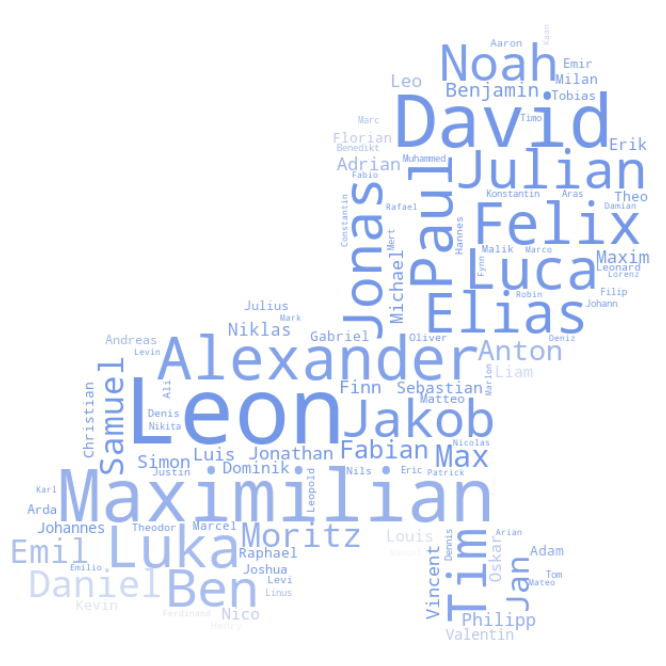

In [14]:
# Generate a word cloud image

wordcloud_baby = WordCloud(collocations = False,background_color="white", mode="RGBA", mask=baby_m).generate(male_alltime)

# create coloring from image
image_colors = ImageColorGenerator(baby_m)
plt.figure(figsize=[12,12])
plt.imshow(wordcloud_baby.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# export settings for the the text to be exported as text rather than single dots
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

# store the chart as vector format
plt.savefig('Illustrator/BabyM.png', transparent=True)

plt.show()

### Wordcloud for female babys (all time)

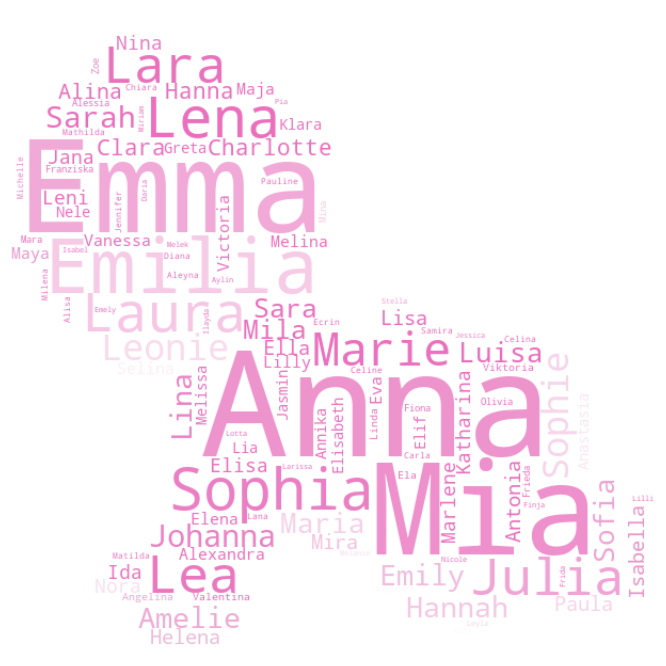

In [15]:
# Generate a word cloud image

wordcloud_baby = WordCloud(collocations = False,background_color="white", mode="RGBA", mask=baby_f).generate(female_alltime)

# create coloring from image
image_colors = ImageColorGenerator(baby_f)
plt.figure(figsize=[12,12])
plt.imshow(wordcloud_baby.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# export settings for the the text to be exported as text rather than single dots
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

# store the chart as vector format
plt.savefig('Illustrator/BabyF.png', transparent = True)

### Wordcloud for Female Names

In [16]:
# split the years for the left footprint and right footprint
years_left=[2006,2008,2010,2012,2014,2016,2018,2020]
years_right=[2007,2009,2011,2013,2015,2017,2019]

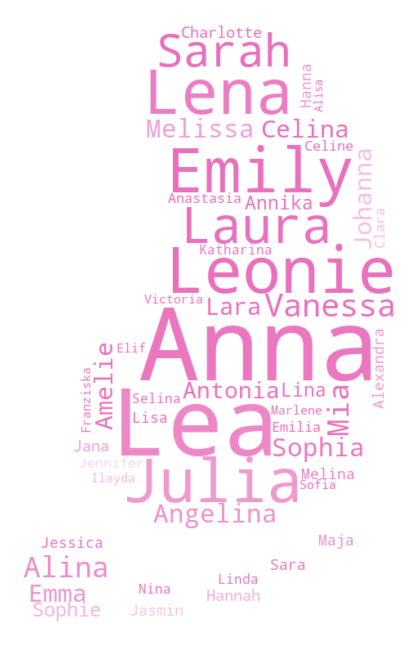

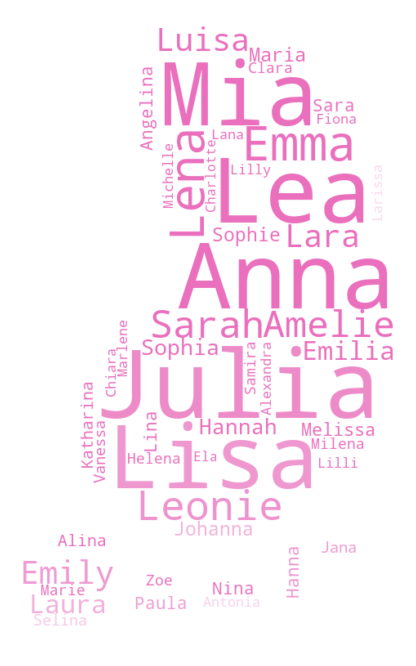

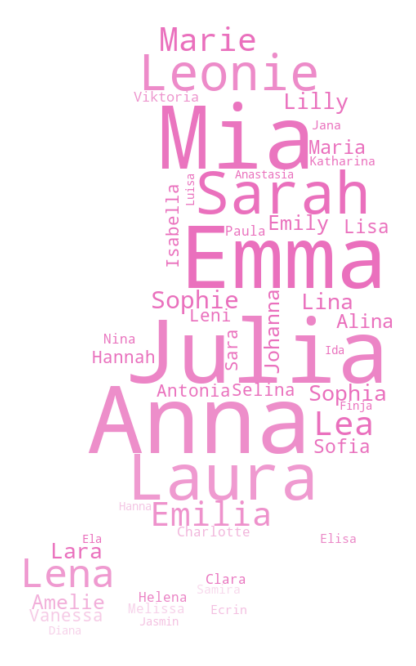

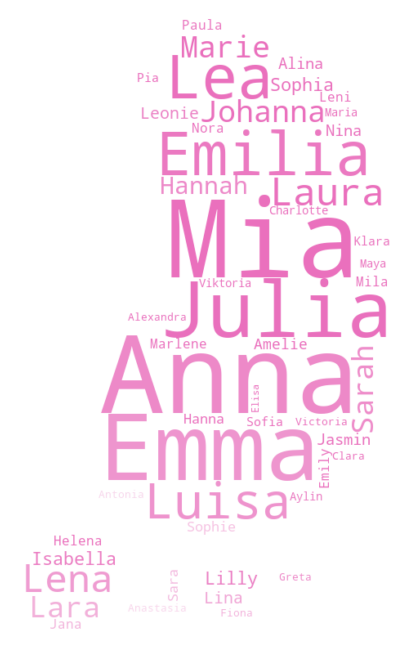

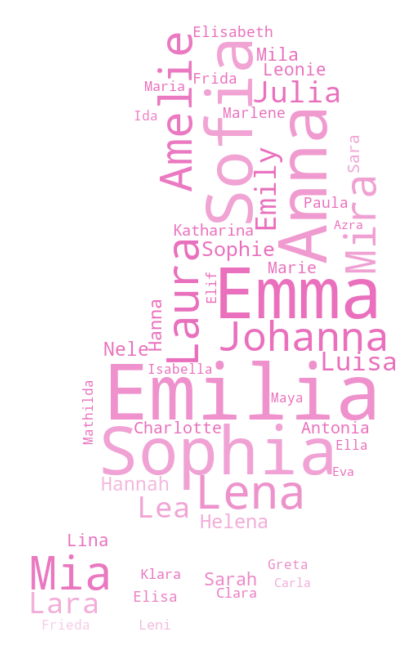

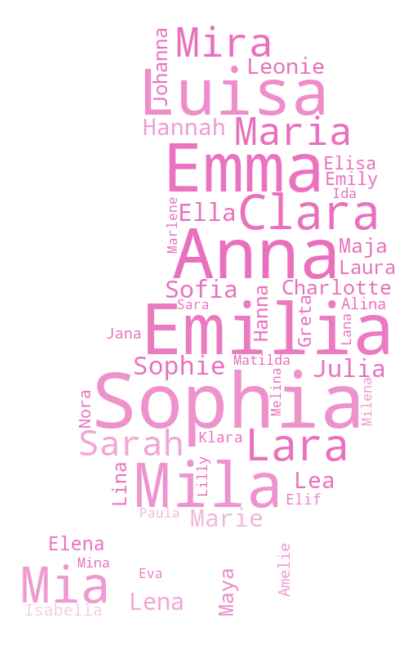

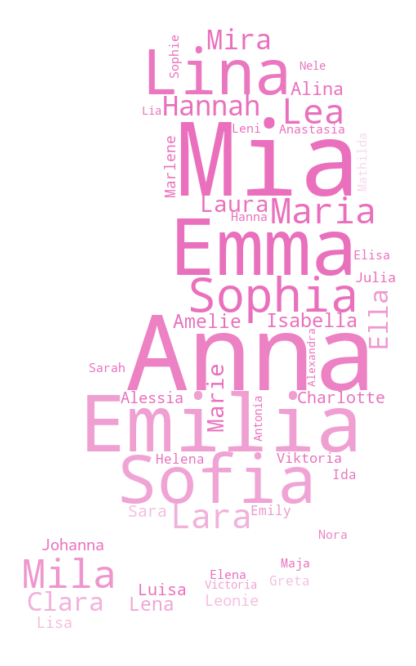

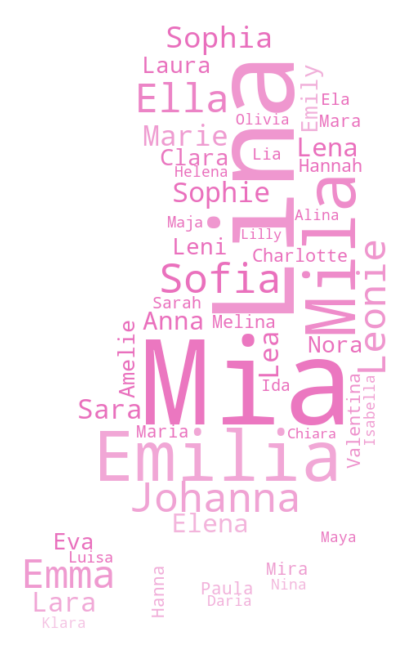

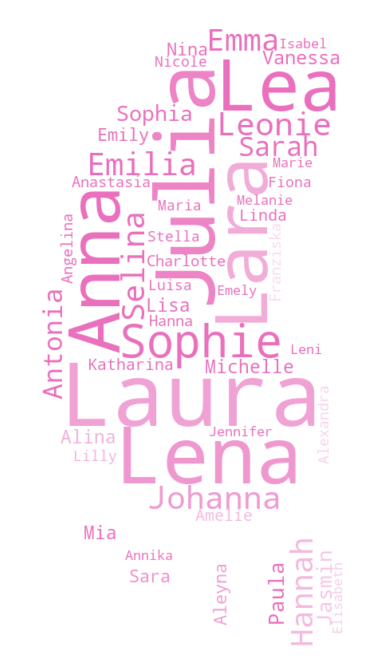

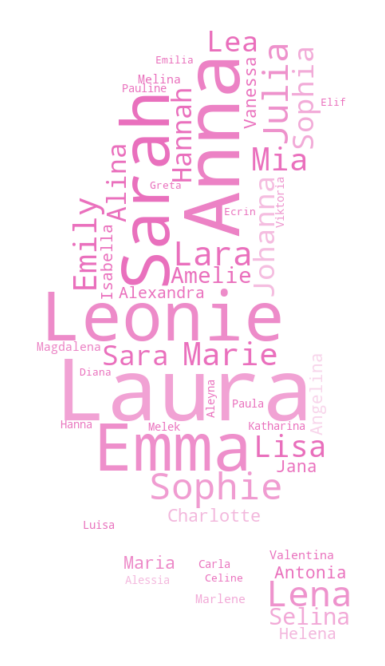

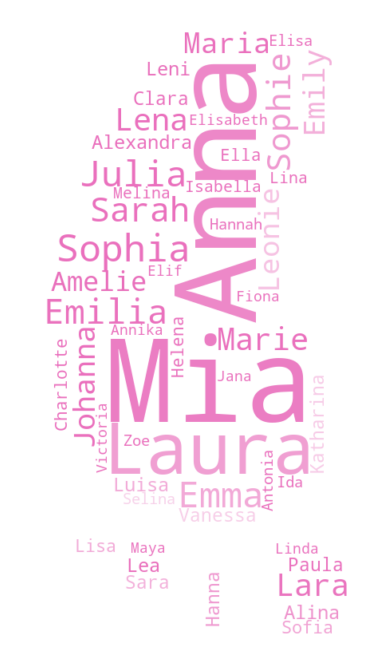

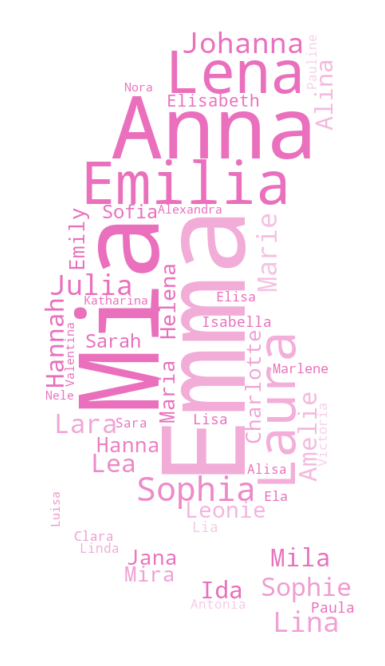

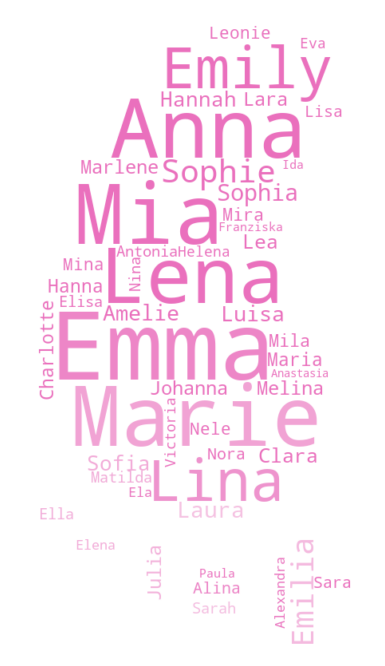

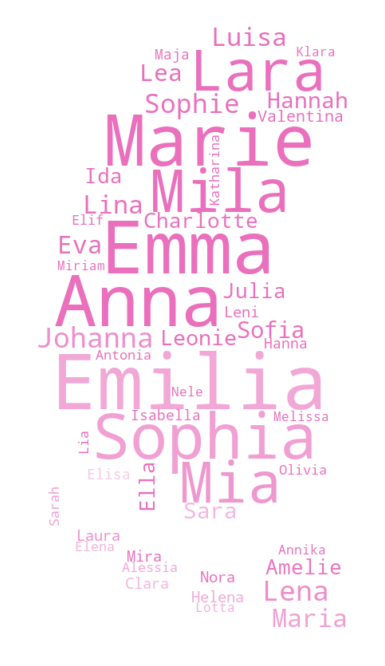

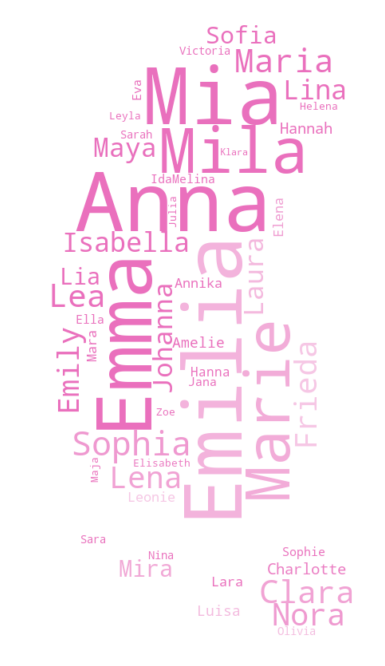

In [22]:
# Generate the Wordclouds
# left foot
for year in years_left:
    # Generate a word cloud image for the individual years
    wordcloud_baby = WordCloud(collocations = False,background_color="white", mode="RGBA", mask=baby_left_f).generate(text_f[year])

    # create coloring from image
    image_colors = ImageColorGenerator(baby_left_f)
    plt.figure(figsize=[12,12])
    plt.imshow(wordcloud_baby.recolor(color_func=image_colors), interpolation="bilinear")
    plt.axis("off")

    # export settings for the the text to be exported as text rather than single dots
    plt.rcParams['pdf.fonttype'] = 42
    plt.rcParams['ps.fonttype'] = 42

    # store the chart as vector format
    plt.savefig(f'Illustrator/f_left{year}.png', transparent = True)
    
#right foot   
for year in years_right:
    # Generate a word cloud image for the individual years
    wordcloud_baby = WordCloud(collocations = False,background_color="white", mode="RGBA", mask=baby_right_f).generate(text_f[year])

    # create coloring from image
    image_colors = ImageColorGenerator(baby_right_f)
    plt.figure(figsize=[12,12])
    plt.imshow(wordcloud_baby.recolor(color_func=image_colors), interpolation="bilinear")
    plt.axis("off")

    # export settings for the the text to be exported as text rather than single dots
    plt.rcParams['pdf.fonttype'] = 42
    plt.rcParams['ps.fonttype'] = 42

    # store the chart as vector format
    plt.savefig(f'Illustrator/f_right{year}.png', transparent = True)

### Wordcloud for Male Names

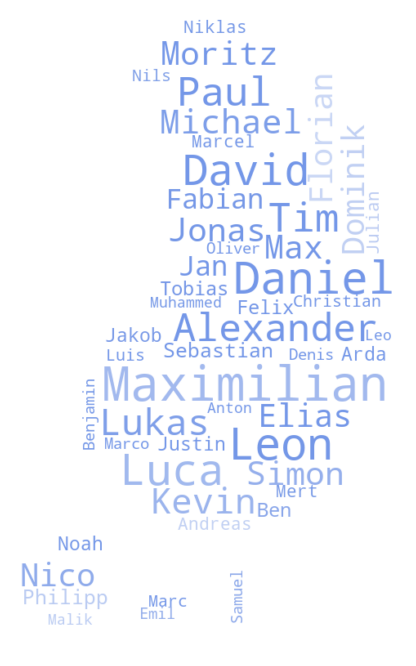

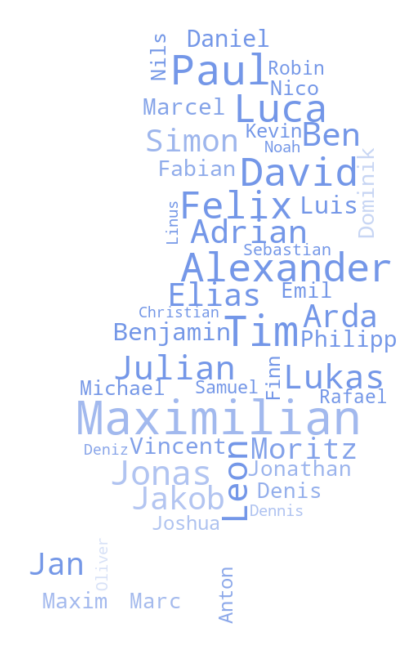

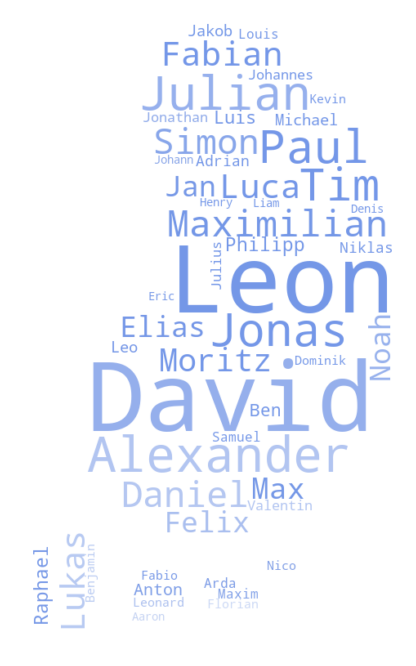

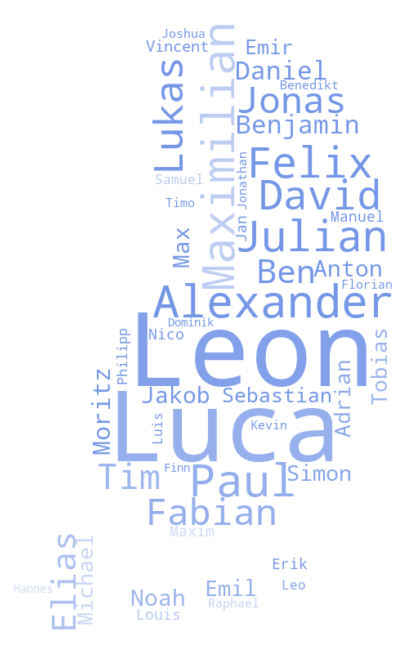

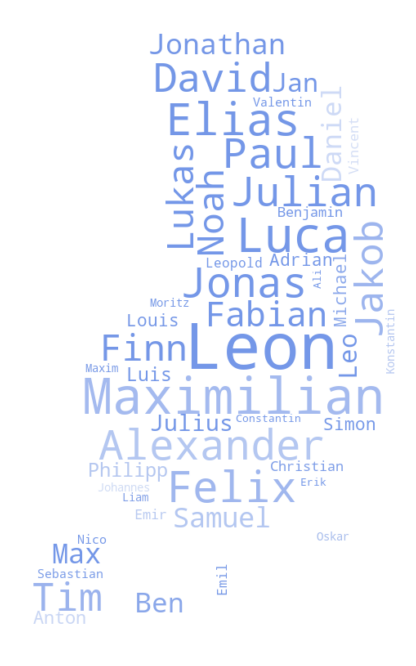

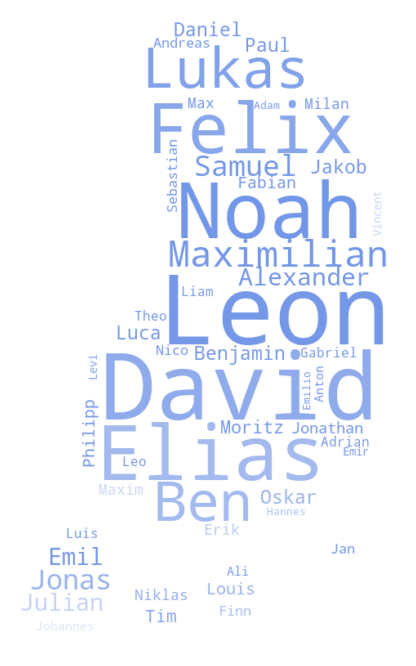

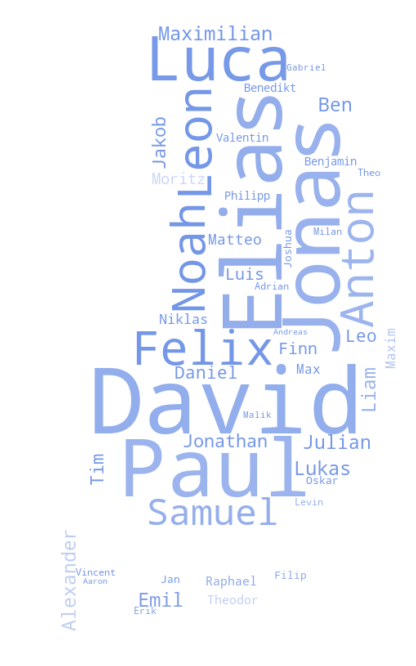

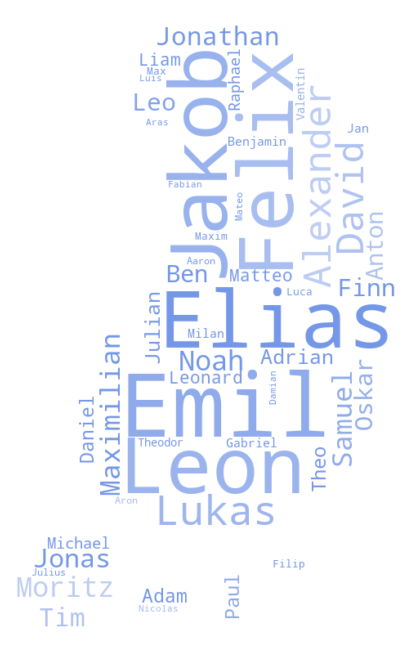

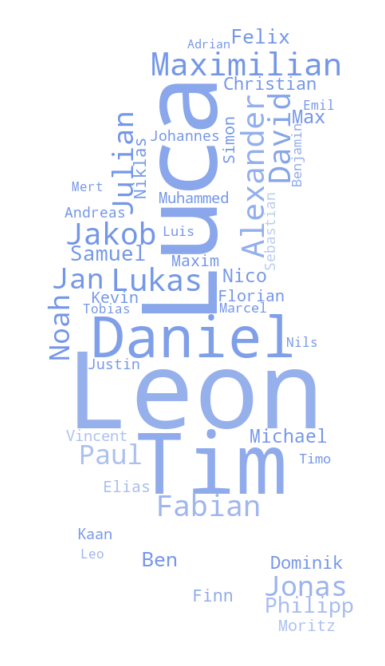

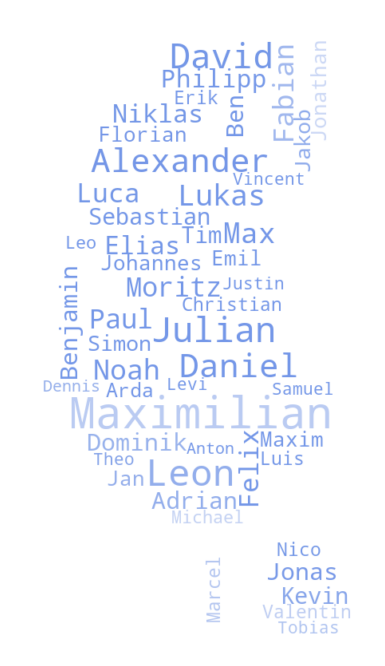

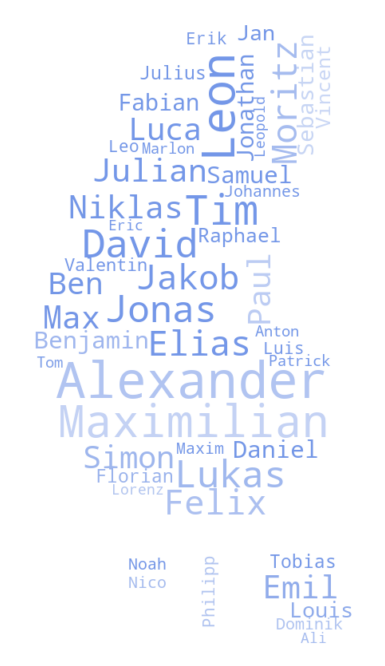

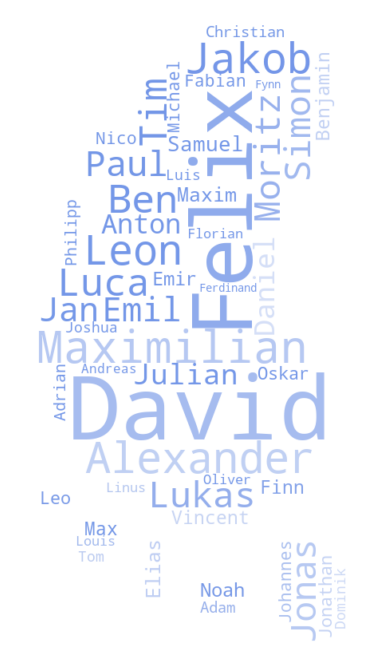

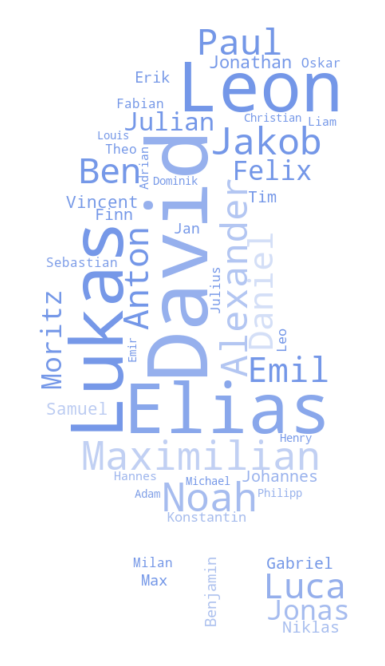

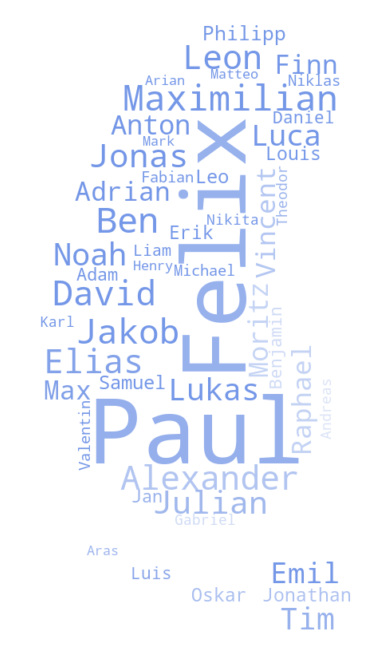

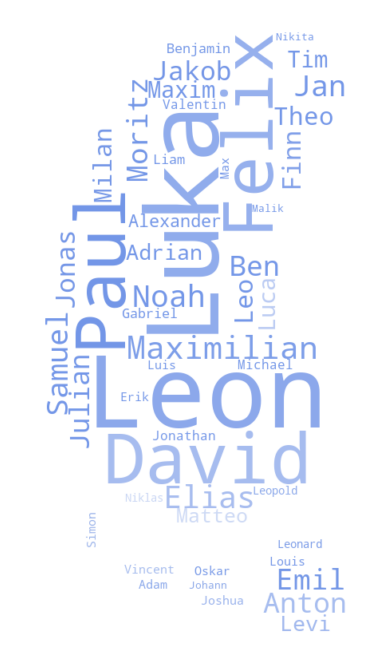

In [21]:
# Generate the Wordclouds
# left foot
for year in years_left:
    # Generate a word cloud image for the individual years
    wordcloud_baby = WordCloud(collocations = False,background_color="white", mode="RGBA", mask=baby_left_m).generate(text_m[year])

    # create coloring from image
    image_colors = ImageColorGenerator(baby_left_m)
    plt.figure(figsize=[12,12])
    plt.imshow(wordcloud_baby.recolor(color_func=image_colors), interpolation="bilinear")
    plt.axis("off")

    # export settings for the the text to be exported as text rather than single dots
    plt.rcParams['pdf.fonttype'] = 42
    plt.rcParams['ps.fonttype'] = 42

    # store the chart as vector format
    plt.savefig(f'Illustrator/m_left{year}.png', transparent = True)
    
#right foot   
for year in years_right:
    # Generate a word cloud image for the individual years
    wordcloud_baby = WordCloud(collocations = False,background_color="white", mode="RGBA", mask=baby_right_m).generate(text_m[year])

    # create coloring from image
    image_colors = ImageColorGenerator(baby_right_m)
    plt.figure(figsize=[12,12])
    plt.imshow(wordcloud_baby.recolor(color_func=image_colors), interpolation="bilinear")
    plt.axis("off")

    # export settings for the the text to be exported as text rather than single dots
    plt.rcParams['pdf.fonttype'] = 42
    plt.rcParams['ps.fonttype'] = 42

    # store the chart as vector format
    plt.savefig(f'Illustrator/m_right{year}.png', transparent = True)